# Exercise 1

## Unsupervised Learning

---

## Overview

Welcome to this excercise. We are now going to use our new skills to build our first unsupervised learning models. In particular, we are going to use multiple methods to create a number unsupervisoed learning models such kmeans for clustering and PCA to reduce the dimensionality of or data.




In [2]:
import sys
import os
# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))# Add the path to sys.path

# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
historical_prices = func_lib.create_hist_prices()
list_of_momentums = []
total_returns     = func_lib.compute_returns(historical_prices, list_of_momentums)
total_returns.dropna(inplace=True)

Loading historical prices from historical_prices.pkl


In [4]:
total_returns.head()

F_1_d_returns
Ticker Date                     
A      2000-01-03      -0.076389
       2000-01-04      -0.062030
       2000-01-05      -0.038076
       2000-01-06       0.083333
       2000-01-07       0.060577

In [5]:
# Group the 'total_returns' DataFrame by the 'Ticker' column.
# Calculate the average return ('mean') and standard deviation ('std') of the 'F_1_d_returns' for each group.
# Use the 'agg()' function with a list of aggregation functions ['mean', 'std'].
# Store the result in a new DataFrame named 'ticker_stats'.

# Display the first few rows of 'ticker_stats' using the 'head()' method.
ticker_stats = total_returns.groupby('Ticker').agg(['mean', 'std'])
ticker_stats.head()

F_1_d_returns          
                mean       std
Ticker                        
A           0.000518  0.025869
AAPL        0.001183  0.024619
ABNB        0.000630  0.032406
ABT         0.000532  0.015260
ACGL        0.000841  0.016831

In [6]:
# Use the 'fit_transform()' method of the scaler to standardize the 'mean' and 'std' columns from 'ticker_stats'.
# Store the standardized data in a new variable named 'ticker_stats_scaled'.
scaler = StandardScaler()
ticker_stats_scaled = scaler.fit_transform(ticker_stats)

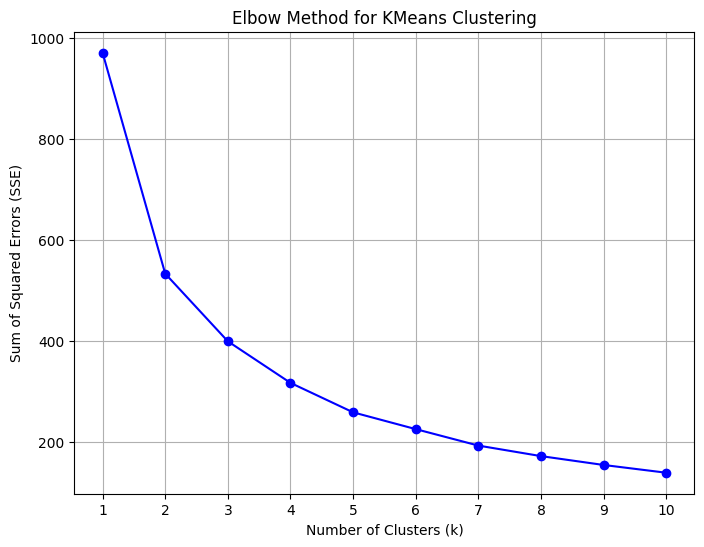

In [7]:
# Initialize an empty list to store the inertia values for different numbers of clusters.
# Define a range of cluster numbers to test, from 1 to 10.

sse = []

# Iterate over the range of cluster numbers.
# For each number of clusters (k):
# - Initialize a KMeans object with 'k' clusters, a random state of 42, and 10 initializations.
# - Fit the KMeans model to the standardized data ('ticker_stats_scaled').
# - Append the inertia (sum of squared distances of samples to their closest cluster center) to the 'sse' list.

k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(ticker_stats_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow method to visualize the inertia for different numbers of clusters.
# - Create a figure with a specified size.
# - Plot the inertia values against the number of clusters, using markers for each point.
# - Add a title, x-axis label, y-axis label, and grid for clarity.
# - Display the plot.

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Optimal number of clusters: 3


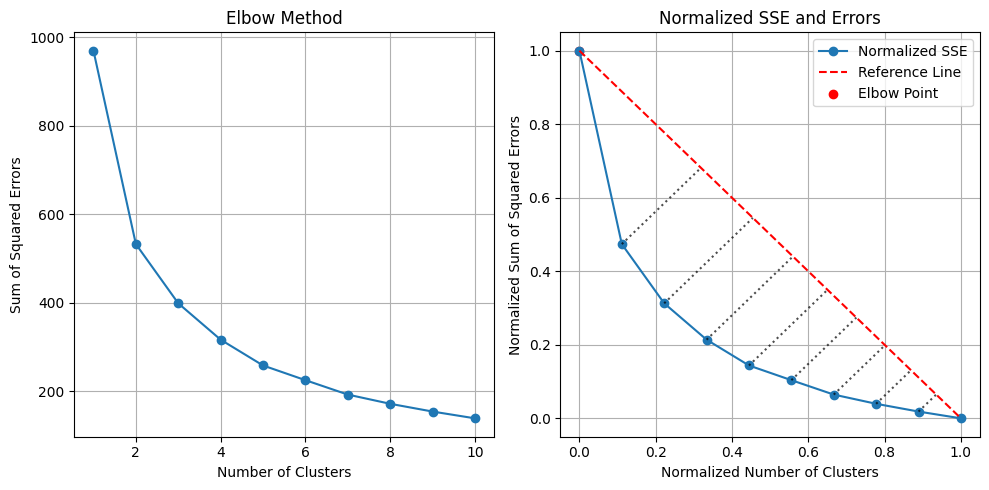

In [8]:
# Use the function 'plot_optimal_cluster_point' from 'func_lib' to determine the optimal number of clusters.
# - Pass the 'sse' list (containing the inertia values) and 'k_range' (the range of cluster numbers) as arguments.
# - This function will help visualize and identify the "elbow" point in the plot, indicating the optimal number of clusters.
func_lib.plot_optimal_cluster_point(sse, k_range)

In [10]:
# Convert the standardized data to a DataFrame if it is not already in that format.
# Use 'pd.DataFrame()' to create a DataFrame from 'ticker_stats_scaled', specifying the column names as 'mean' and 'std'.
ticker_stats_df = pd.DataFrame(ticker_stats_scaled, columns=['mean', 'std'])

# Define the number of clusters for K-Means clustering.
# Set the variable 'k' to 3 to specify the number of clusters.
k=3

# Perform K-Means clustering.
# Initialize a KMeans object with 'n_clusters' set to 'k' and 'random_state' set to 42.
# Fit the KMeans model to 'ticker_stats_df' and predict the cluster labels.
# Store the predicted cluster labels in the variable 'clusters'.

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(ticker_stats_df)

# Add the cluster labels to the DataFrame.
# Create a new column named 'Cluster' in 'ticker_stats_df' and assign the cluster labels to this column.
# Display the first few rows of 'ticker_stats_df' to check the added cluster labels.
ticker_stats_df['Cluster'] = clusters

ticker_stats_df.head()

,mean,std,Cluster
0,-0.646396,0.439085,1
1,1.253823,0.250344,1
2,-0.325248,1.426181,1
3,-0.607542,-1.163007,0
4,0.277287,-0.925771,0


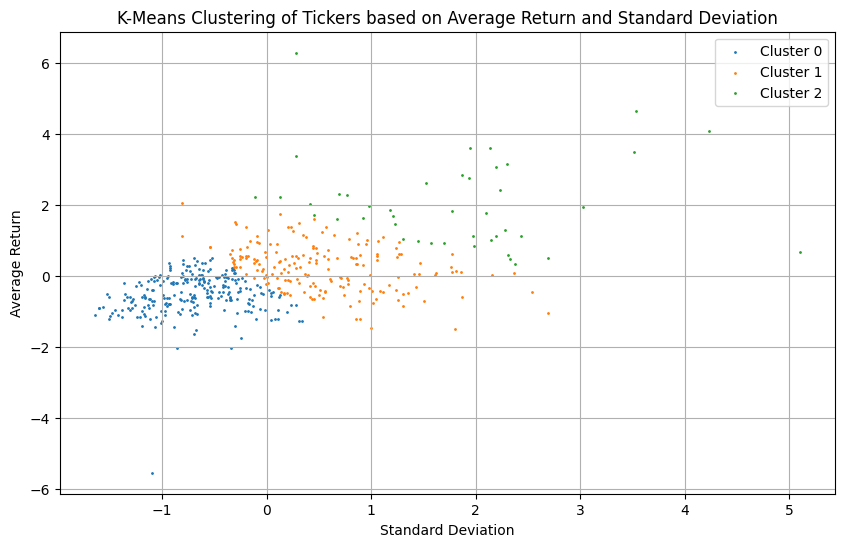

In [11]:
# Create a new figure with a specified size for the plot.
# Iterate over each cluster (from 0 to k-1).
# Use 'plt.scatter()' to plot the 'std' (standard deviation) vs. 'mean' (average return) for each cluster.
# Filter the 'ticker_stats' DataFrame using the cluster labels from 'ticker_stats_scaled'.
# Use different colors and labels for each cluster.
# Add a title, x-axis label, y-axis label, and a legend to the plot.
# Display the grid for better readability.
# Finally, use 'plt.show()' to display the plot.

plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(ticker_stats_df[ticker_stats_df['Cluster'] == cluster]['std'],
                ticker_stats_df[ticker_stats_df['Cluster'] == cluster]['mean'],
                label=f'Cluster {cluster}', s=1)
plt.title('K-Means Clustering of Tickers based on Average Return and Standard Deviation')
plt.xlabel('Standard Deviation')
plt.ylabel('Average Return')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
ticker_stats_df.shape

(485, 3)

In [19]:
ticker_stats_df.head()

,mean,std,Cluster
0,-0.646396,0.439085,1
1,1.253823,0.250344,1
2,-0.325248,1.426181,1
3,-0.607542,-1.163007,0
4,0.277287,-0.925771,0


In [18]:
ticker_stats.head()

F_1_d_returns          
                mean       std
Ticker                        
A           0.000518  0.025869
AAPL        0.001183  0.024619
ABNB        0.000630  0.032406
ABT         0.000532  0.015260
ACGL        0.000841  0.016831

In [25]:
ticker_stats = ticker_stats.reset_index()

In [26]:
ticker_stats.head()

Ticker F_1_d_returns          
                  mean       std
0      A      0.000518  0.025869
1   AAPL      0.001183  0.024619
2   ABNB      0.000630  0.032406
3    ABT      0.000532  0.015260
4   ACGL      0.000841  0.016831

In [27]:
combined = pd.concat([ticker_stats_df, ticker_stats], axis=1)

In [28]:
combined.head()

,mean,std,Cluster,"(Ticker, )","(F_1_d_returns, mean)","(F_1_d_returns, std)"
0,-0.646396,0.439085,1,A,0.000518,0.025869
1,1.253823,0.250344,1,AAPL,0.001183,0.024619
2,-0.325248,1.426181,1,ABNB,0.000630,0.032406
3,-0.607542,-1.163007,0,ABT,0.000532,0.015260
4,0.277287,-0.925771,0,ACGL,0.000841,0.016831


In [31]:
combined[combined['Cluster'].isin([0])]

,mean,std,Cluster,"(Ticker, )","(F_1_d_returns, mean)","(F_1_d_returns, std)"
3,-0.607542,-1.163007,0,ABT,0.000532,0.015260
4,0.277287,-0.925771,0,ACGL,0.000841,0.016831
5,0.034890,-0.630278,0,ACN,0.000756,0.018788
8,-0.553430,-0.544286,0,ADM,0.000550,0.019357
9,-0.701294,-1.079365,0,ADP,0.000499,0.015814
...,...,...,...,...,...,...
479,-0.858599,-0.948492,0,XOM,0.000444,0.016680
480,-0.049733,-0.950564,0,XYL,0.000727,0.016666
481,-0.083884,-0.783895,0,YUM,0.000715,0.017770
482,-0.920074,-0.808979,0,ZBH,0.000422,0.017604


In [32]:
combined[combined['Cluster'].isin([1])]

,mean,std,Cluster,"(Ticker, )","(F_1_d_returns, mean)","(F_1_d_returns, std)"
0,-0.646396,0.439085,1,A,0.000518,0.025869
1,1.253823,0.250344,1,AAPL,0.001183,0.024619
2,-0.325248,1.426181,1,ABNB,0.000630,0.032406
6,0.471070,0.586144,1,ADBE,0.000909,0.026843
7,-0.274537,0.416017,1,ADI,0.000648,0.025716
...,...,...,...,...,...,...
468,-0.486201,0.162598,1,WFC,0.000574,0.024038
470,0.241026,1.766384,1,WMB,0.000829,0.034659
473,0.560993,1.057900,1,WSM,0.000941,0.029967
477,0.625389,1.283993,1,WYNN,0.000963,0.031464


In [30]:
combined[combined['Cluster'].isin([2])]

,mean,std,Cluster,"(Ticker, )","(F_1_d_returns, mean)","(F_1_d_returns, std)"
20,1.302143,2.286333,2,ALGN,0.001200,0.038102
25,1.129717,2.434845,2,AMD,0.001140,0.039086
31,2.314294,0.693261,2,ANET,0.001554,0.027552
43,2.218817,-0.111098,2,AVGO,0.001521,0.022226
46,3.168834,2.296723,2,AXON,0.001853,0.038171
59,1.005835,2.152114,2,BKNG,0.001096,0.037213
61,1.933701,3.024291,2,BLDR,0.001421,0.042989
71,3.390840,0.278920,2,CARR,0.001931,0.024808
75,0.929192,1.574734,2,CBRE,0.001069,0.033390
80,6.293359,0.282462,2,CEG,0.002947,0.024832


# 